In [11]:
%matplotlib inline
import numpy
from matplotlib import pyplot
import math
from numpy import linalg as la

def Hamiltonian(kx,ky, np, mp, nd, md):
    D0=1.
    tpp=1.
    tdp=1.
    Up=1.
    Ud=1.
    
    
    g1=-tpp*numpy.exp(1j*(kx/2.+ky/2.))-tpp*numpy.exp(1j*(-kx/2.-ky/2.))
    g0=tpp*numpy.exp(1j*(kx/2.-ky/2.))+tpp*numpy.exp(1j*(-kx/2.+ky/2.))
    d0=tdp*numpy.exp(-1j*kx/2.)
    d1=-tdp*numpy.exp(1j*kx/2.)
    d2=-tdp*numpy.exp(-1j*ky/2.)
    d3=tdp*numpy.exp(1j*ky/2.)
    
    g1d=-tpp*numpy.exp(-1j*(kx/2.+ky/2.))-tpp*numpy.exp(-1j*(-kx/2.-ky/2.))
    g0d=tpp*numpy.exp(-1j*(kx/2.-ky/2.))+tpp*numpy.exp(-1j*(-kx/2.+ky/2.))
    d0d=tdp*numpy.exp(1j*kx/2.)
    d1d=-tdp*numpy.exp(-1j*kx/2.)
    d2d=-tdp*numpy.exp(1j*ky/2.)
    d3d=tdp*numpy.exp(-1j*ky/2.)
    
    H=numpy.zeros((6,6),complex)
    H[0,:]=[-mp*Up+Up*np/2.,0.0,g0,g1,d0,d1]
    H[1,:]=[0.0,+mp*Up+Up*np/2.,g1,g0,d1,d0]
    H[2,:]=[g0d,g1d,-mp*Up+Up*np/2.,0.0,d2,d3]
    H[3,:]=[g1d,g0d,0.0,+mp*Up+Up*np/2.,d3,d2]
    H[4,:]=[d0d,d1d,d2d,d3d,D0-md*Ud+Ud*nd/2.,0.0]
    H[5,:]=[ d1d,d0d,d3d,d2d,0.0,D0+md*Ud+Ud*nd/2.]
    return H

-4.41657599042
4.889


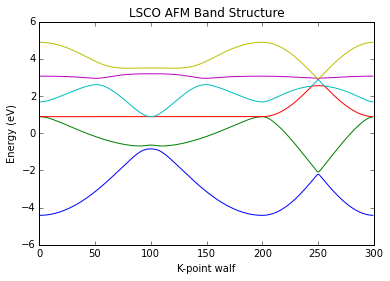

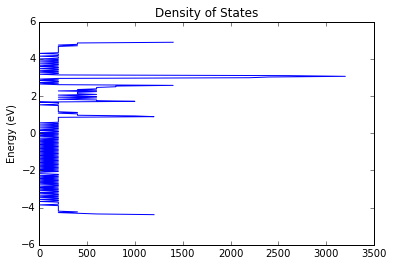

In [13]:
#initialize 
beta=0.1
N=4
ni=numpy.zeros(N)
ni_new=numpy.zeros(N)

delta=100.
tol=1.E-6
Nk=100
dk=math.pi/Nk
eigenvals=numpy.zeros((6,3*Nk))
bands=numpy.zeros((6,3*Nk))
md=0.26
nd=1.444
mp=0.
x=0.
np=(5.+x-nd)/2.
#mu=4.9701
for i in range(3):
    for j in range(Nk):
        if i==0:
            kx=j*dk
            ky=0.
        if i==1:
            kx=math.pi
            ky=j*dk
        if i==2:
            kx=math.pi-j*dk
            ky=math.pi-j*dk
        H=Hamiltonian(kx,ky, np, mp, nd, md)    
        E,V = la.eig(H)
        eigenvals[:,i*Nk+j]=numpy.real(E)
        
        

for ii in range(len(eigenvals[0,:])):
    bands[:,ii]=numpy.sort(eigenvals[:,ii])
for ii in range(6):
    pyplot.plot(bands[ii,:])
    
pyplot.title("LSCO AFM Band Structure")
pyplot.ylabel("Energy (eV)")
pyplot.xlabel("K-point walf")
    
    
#Density of States

N=100
kx=numpy.linspace(-1.*math.pi, math.pi, N)
ky=numpy.linspace(-1.*math.pi, math.pi, N)

E=numpy.zeros(6.*N*N)
count=0;
for i in range(len(kx)):
    for j in range(len(ky)):
        H=Hamiltonian(kx[i],ky[i], np, mp, nd, md)    
        D,V = la.eig(H)
        for n in range(6):
            E[count]=numpy.real(D[n])
            count+=1

Emin=min(E)        
Emax=max(E)
n_bins=250
print Emin 
print Emax


hist, bin_edge= numpy.histogram(E,bins=numpy.linspace(Emin,Emax,n_bins))
pyplot.figure()
pyplot.plot(hist,bin_edge[1:])  
pyplot.title("Density of States")
pyplot.ylabel("Energy (eV)")

        

In [2]:
def mu(np, mp, nd, md):
    N=100
    kx=numpy.linspace(-1.*math.pi, math.pi, N)
    ky=numpy.linspace(-1.*math.pi, math.pi, N)
    
    #Finds energy bands on k-mesh
    E=numpy.zeros(6.*N*N)
    count=0;
    for i in range(len(kx)):
        for j in range(len(ky)):
            H=Hamiltonian(kx[i],ky[i], np, mp, nd, md)    
            D,V = la.eig(H)
            for n in range(6):
                E[count]=numpy.real(D[n])
                count+=1
    mu=E[n-1]    
            